In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the dataset (Ensure heart.csv is in the same folder as your script)
df = pd.read_csv('heart.csv')

# Check the first 5 rows and data info
print(df.head())
print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [4]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


Using 'num' as the prediction target.
Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


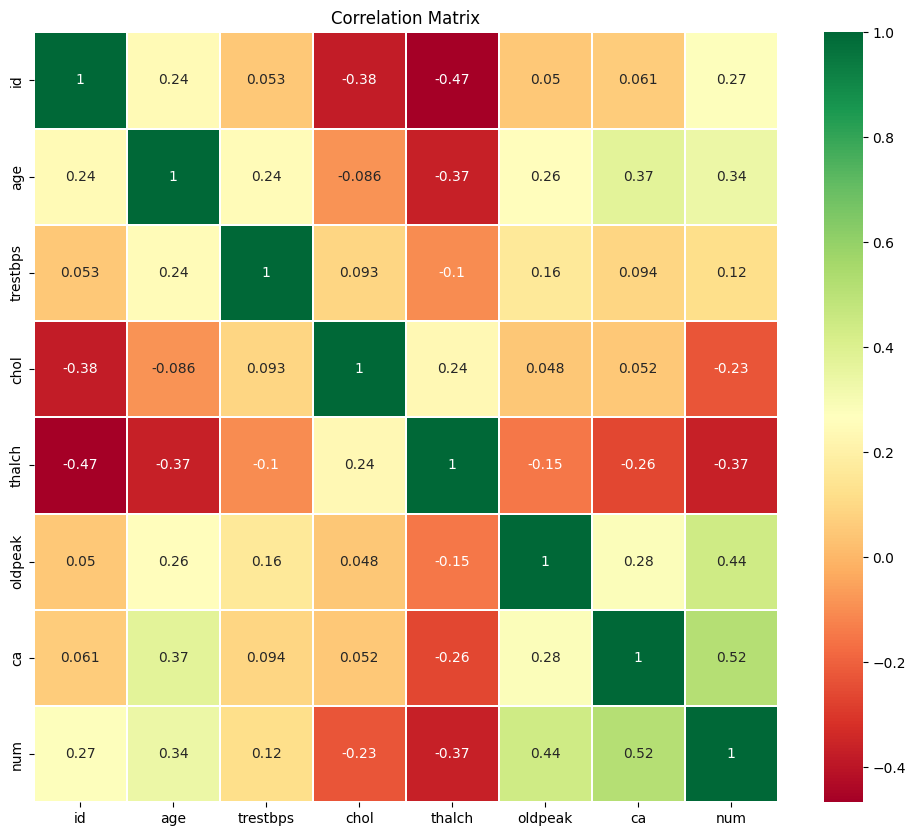

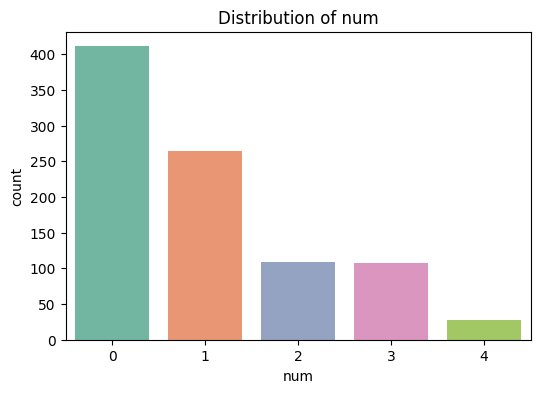

In [5]:
# 1. Dynamically find the target column (usually the last one)
target_col = df.columns[-1] 
print(f"Using '{target_col}' as the prediction target.")

# 2. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 3. Visualizing the correlation (Fixed for Pandas 2.0+)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

# 4. Target distribution (Fixed with dynamic column name)
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, hue=target_col, palette='Set2', legend=False)
plt.title(f'Distribution of {target_col}')
plt.show()

In [7]:
# 1. Identify which columns are numbers and which are categories
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

print("Columns that need converting:", list(object_cols))

# 2. Convert categories to numbers (One-Hot Encoding)
# This turns a "Sex" column into "Sex_Male" and "Sex_Female" (0s and 1s)
df_final = pd.get_dummies(df, drop_first=True)

# 3. Re-define X and y using the new encoded dataframe
target_col = df_final.columns[-1] # Assuming target is still the last one
X = df_final.drop(target_col, axis=1)
y = df_final[target_col]

# 4. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# This will now work because all values are 0, 1, or numbers!
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Success! Preprocessing complete.")
print(f"Number of features after encoding: {X_train.shape[1]}")

Columns that need converting: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Success! Preprocessing complete.
Number of features after encoding: 22


In [9]:
# 1. Handle Missing Values (Imputation)
# We fill missing numeric values with the 'median' of the column
df_filled = df.copy()
for col in df_filled.columns:
    if df_filled[col].dtype == 'object':
        df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])
    else:
        df_filled[col] = df_filled[col].fillna(df_filled[col].median())

# 2. Convert categories to numbers (One-Hot Encoding)
df_final = pd.get_dummies(df_filled, drop_first=True)

# 3. Define X and y
target_col = df_final.columns[-1] 
X = df_final.drop(target_col, axis=1)
y = df_final[target_col]

# 4. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. NOW TRAIN (Step 4)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


C:\Users\Kinza\AppData\Local\Temp\ipykernel_1580\2996163695.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])
C:\Users\Kinza\AppData\Local\Temp\ipykernel_1580\2996163695.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])


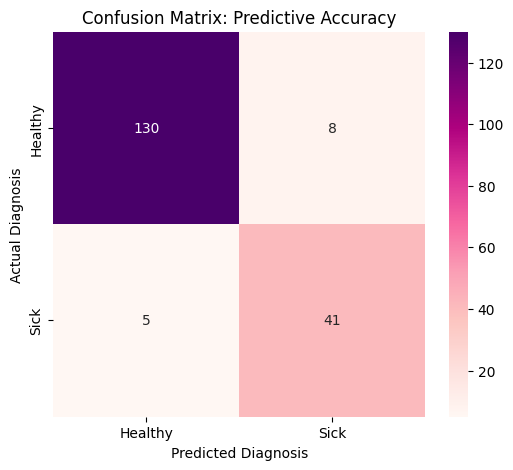

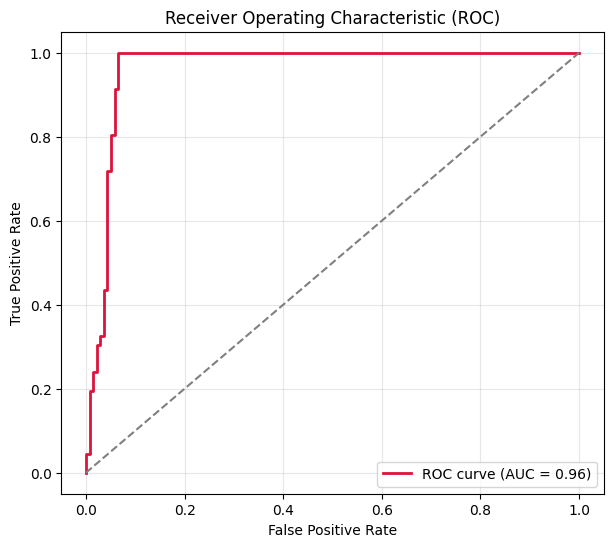

C:\Users\Kinza\AppData\Local\Temp\ipykernel_1580\3896940151.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='coolwarm')


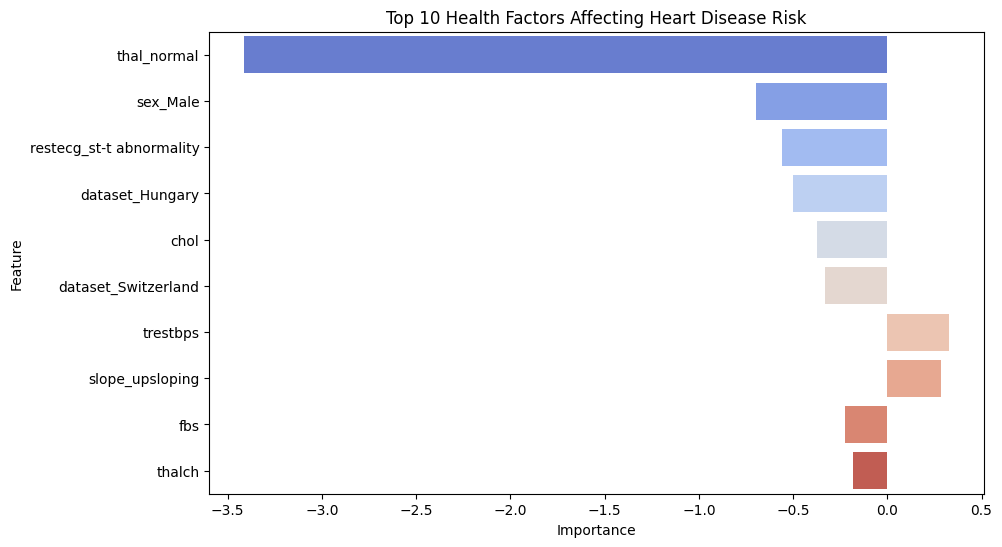


--- Final Performance Metrics ---
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       138
        True       0.84      0.89      0.86        46

    accuracy                           0.93       184
   macro avg       0.90      0.92      0.91       184
weighted avg       0.93      0.93      0.93       184



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 1. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Healthy', 'Sick'], yticklabels=['Healthy', 'Sick'])
plt.title('Confusion Matrix: Predictive Accuracy')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='crimson', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 4. Feature Importance (High-Impact Factors)
importance = model.coef_[0]
feature_names = X.columns
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_importances['AbsImportance'] = feat_importances['Importance'].abs()
feat_importances = feat_importances.sort_values(by='AbsImportance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='coolwarm')
plt.title('Top 10 Health Factors Affecting Heart Disease Risk')
plt.show()

print("\n--- Final Performance Metrics ---")
print(classification_report(y_test, y_pred))